In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pylab as plt

from vision.spike_tools.pattern import pattern_generator as pat_gen
from vision.spike_tools.vis import vis_tools as spk_vis
from vision.sim_tools.connectors import standard_connectors as std_conn

from pyNN import nest as sim
# from pyNN import spiNNaker as sim
# if sim.__name__ == 'pyNN.spiNNaker':
#     import spynnaker_extra_pynn_models as q



In [2]:
def set_in_pop(sim, single_patt, num_neurons, w2s=2.):
#     print("Setting-up Input population...")

    cell = sim.IF_curr_exp
    params = { 'cm': 0.2,  # nF
               'i_offset': 0.0,
               'tau_m': 10.0,
               'tau_refrac': 2.0,
               'tau_syn_E': 2.,
               'tau_syn_I': 2.,
               'v_reset': -70.0,
               'v_rest': -65.0,
               'v_thresh': -55.4
             }
    dmy_pops = []
    dmy_prjs = []
    
    if sim.__name__ == 'pyNN.nest':
        in_pop = sim.Population(num_neurons, cell, params, label='input pattern')
        for i in range(num_neurons):
            dmy_pops.append( sim.Population(1, sim.SpikeSourceArray, 
                                            {'spike_times': single_patt[i]},
                                            label='dummy neuron %d'%i) )
            conn = [(0, i, w2s, 1)]
            dmy_prjs.append(sim.Projection(dmy_pops[i], in_pop,
                                           sim.FromListConnector(conn),
                                           target='excitatory'))

    else:
        in_pop = sim.Population(num_neurons, sim.SpikeSourceArray,
                                {'spike_times': single_patt},
                                label='input population')

    return in_pop, dmy_pops, dmy_prjs

def plot_sim_spikes(spikes, pops):
    sizes = [pops[k].size for k in pops]
    max_size = np.max(sizes)
    fig = plt.figure(figsize=(10, 9))
    f = 1
    for i in spikes:
        ax = plt.subplot(2, 1, f)
        f += 1
        spk_vis.plot_output_spikes(spikes[i], plotter=ax)
        ax.set_title(i)
        ax.set_ylim([-1, max_size])
        ax.set_xlim([-1, run_time + 1 ])
    plt.show()
    
def plot_weight_diff(start_w, new_w, a_plus, a_minus, w2s):
    s_w_r = start_w.reshape(new_w.shape)
    dw = new_w - s_w_r
    max_dw = max(np.abs(a_plus), np.abs(a_minus))
    fig = plt.figure()
    ax = plt.subplot(1, 3, 1)
    spk_vis.my_imshow(ax, s_w_r, vmin=0, vmax=w2s)
    ax = plt.subplot(1, 3, 2)
    spk_vis.my_imshow(ax, new_w, vmin=0, vmax=w2s)
    ax = plt.subplot(1, 3, 3)
    spk_vis.my_imshow(ax, dw, vmin=-max_dw, vmax=max_dw)
    plt.show()

	populations


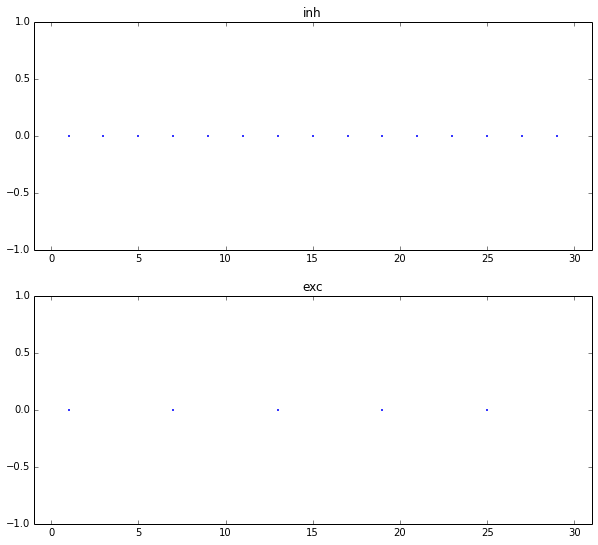

In [4]:
cell = sim.IF_curr_exp
i_offset = 10. # mA ???
exc_params = { 'cm': 0.2,  # nF
               'i_offset': i_offset,
               'tau_m': 10.0,
               'tau_refrac': 5.0,
               'tau_syn_E': 2.5,
               'tau_syn_I': 2.,
               'v_reset': -70.0,
               'v_rest': -65.0,
               'v_thresh': -55.4
             }
inh_params = { 'cm': 0.2,  # nF
               'i_offset': i_offset,
               'tau_m': 10.0,
               'tau_refrac': 1.0,
               'tau_syn_E': 2.5,
               'tau_syn_I': 7.5,
               'v_reset': -70.0,
               'v_rest': -65.0,
               'v_thresh': -55.4
             }

if sim.__name__ == 'pyNN.spiNNaker':
    sim.set_number_of_neurons_per_core(sim.IF_curr_exp, 100)

sim.setup(timestep=1., min_delay=1.)
print("\tpopulations")
pops = {}
pops['exc'] = sim.Population(1, cell, exc_params, label='excitatory')
pops['exc'].record()
pops['exc'].record_v()
pops['inh'] = sim.Population(1, cell, inh_params, label='inhibitory')
pops['inh'].record()
pops['inh'].record_v()
run_time = 30 #ms
sim.run(run_time)
spikes = {}
volts  = {}
for k in pops:
    spikes[k] = pops[k].getSpikes(compatible_output=True)
    volts[k]  = pops[k].get_v(compatible_output=True)


sim.end()
plot_sim_spikes(spikes, pops)

# for k in volts:
#     fig = plt.figure(figsize=(10, 4))
#     ax = plt.subplot( 1, 1, 1)
#     plt.plot(volts[k][:,1], volts[k][:, 2])
#     ax.set_title("volts %s"%k)
#     plt.plot
    